In [6]:
#decision tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split, cross_validate,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.pipeline import Pipeline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
df = pd.read_csv("abalone.csv")

In [10]:
df = df.dropna()

In [12]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [15]:
col_drop=['Shucked weight','Viscera weight','Shell weight']
df = df.drop(col_drop,axis=1)

In [19]:
X = pd.get_dummies(df.drop('Sex',axis=1),drop_first=False)
y = df['Sex']

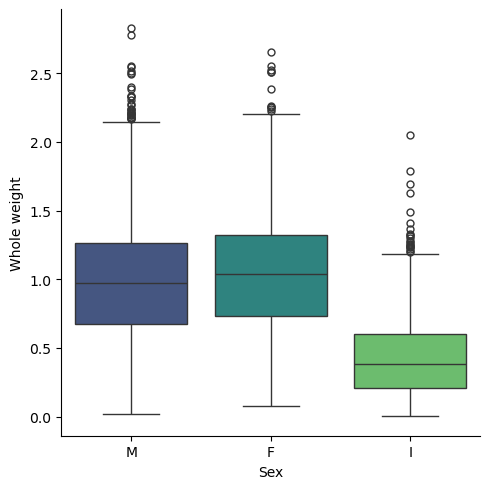

In [22]:
sns.catplot(x='Sex',y='Whole weight',data=df,kind='box',palette='viridis')

In [41]:
#10 random trees
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [45]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=101)

In [48]:
preds = model.predict(X_test)

In [55]:
cm = confusion_matrix(y_test, preds,normalize='true')

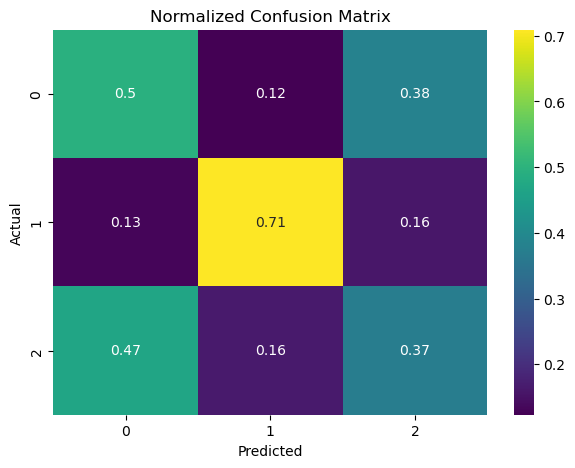

In [57]:
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Normalized Confusion Matrix')
plt.show()

In [66]:
print(classification_report(y_test,preds)) #

              precision    recall  f1-score   support

           F       0.39      0.50      0.44       357
           I       0.71      0.71      0.71       423
           M       0.46      0.37      0.41       474

    accuracy                           0.52      1254
   macro avg       0.52      0.52      0.52      1254
weighted avg       0.53      0.52      0.52      1254



In [70]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance'])

,Feature Importance
Length,0.171441
Diameter,0.177505
Height,0.173853
Whole weight,0.323455
Rings,0.153746


In [79]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))

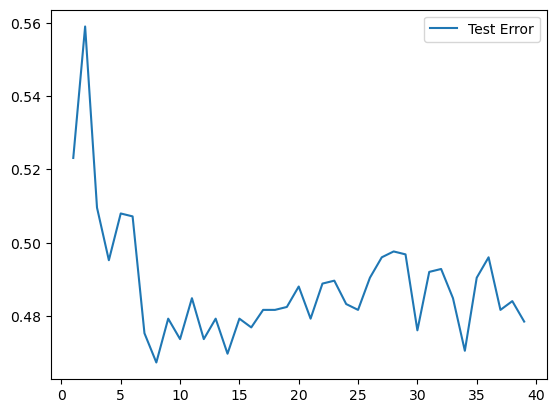

In [81]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()

Feature Importances:
 Whole weight    0.348653
Length          0.166674
Diameter        0.166549
Height          0.160522
Rings           0.157602
dtype: float64


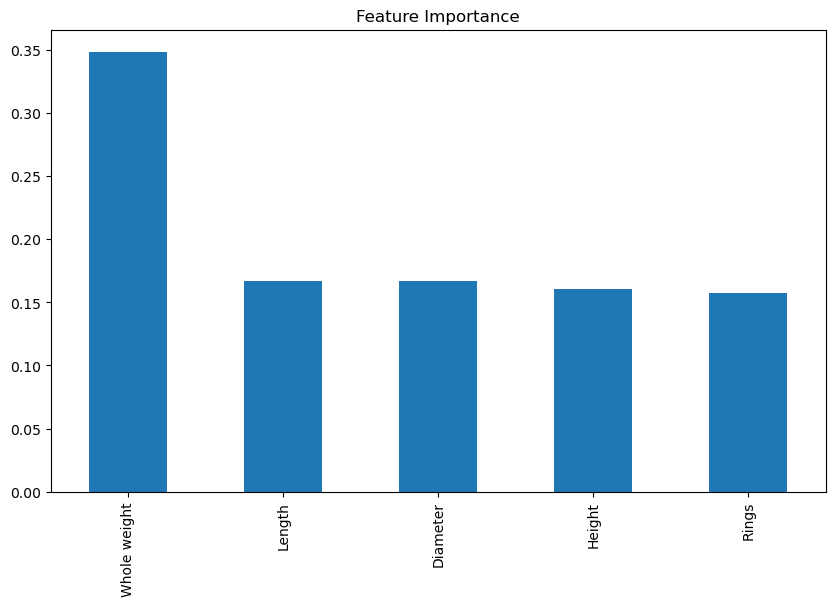

In [85]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", feature_importances)
feature_importances.plot(kind='bar', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

In [165]:
def report_model(model):
    model_preds = model.predict(X_test)
    print(classification_report(y_test,model_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(model,filled=True,feature_names=X.columns);